In [82]:
import pandas as pd
import numpy as np
import pandas as pd
# tsv_file='TH_data_challenge.tsv'
# csv_table=pd.read_table(tsv_file,sep='\t')
# csv_table.to_csv('data_.csv',index=False)

In [83]:
df = pd.read_csv('data_.csv', sep=',')

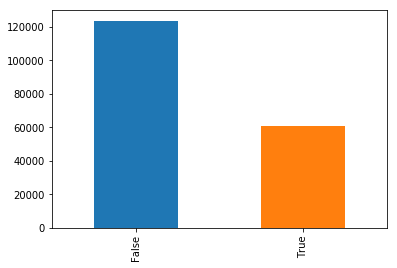

In [84]:
df['dim_is_requested'].value_counts().plot(kind='bar')

In [85]:
df1, df2 = [x for _, x in df.groupby(df['dim_is_requested']==False)]

In [88]:
print df1.shape
print df2.shape

(60510, 46)
(123769, 46)


In [89]:
df3=df2.sample(n=60000, random_state=1)

In [93]:
df1=pd.concat([df1, df3])

In [95]:
df=df1

In [96]:
Y=df.loc[:, :'dim_is_requested']
df['ds'] = pd.DatetimeIndex(df['ds']).month
df['ds_night'] = pd.DatetimeIndex(df['ds_night']).month
print df.head()
df.drop(df.columns[[0,3,4]], axis=1, inplace=True)


    dim_is_requested  ds_night  ds                       id_listing_anon  \
1               True         1  12  82fdda07-6993-4cca-8ee4-fc218d2c07c7   
3               True         2   1  66baade6-9352-4d7c-b590-745899bd12b3   
4               True         2   1  01e3589e-a50a-494b-8cb2-9645b29476d0   
7               True         3   2  e073fc50-8b2a-485f-8daa-e66d0e936424   
11              True         4   3  9c20bc49-c460-4fa8-ba06-9de11b1d6979   

                            id_user_anon  m_effective_daily_price  \
1   559d8981-0c75-4631-9582-a3b644bb5631                70.000000   
3   af691f3d-525e-497c-b9c5-8750b097b04d               126.866667   
4   6733a1d9-d485-4ea7-b8d2-883ee8a363b9               210.714286   
7   5eaad1fa-debf-46de-92ab-32c6a1dcb074               340.000000   
11  805f744e-d26b-494d-91f6-69a0c5b05fd8               459.000000   

    m_pricing_cleaning_fee   dim_market    dim_lat     dim_lng  \
1                      0.0  Los Angeles  34.108578 -118.208600

In [97]:
def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        #print ("found")
        return series.fillna(series.mean())
    elif series.dtype is pd.np.dtype(object):
        #print ("case2")
        return series.fillna('.')
    else:
        return series

In [98]:
df = df.apply(myfillna)
#print df.head()
print df.dtypes

ds_night                                                int64
ds                                                      int64
m_effective_daily_price                               float64
m_pricing_cleaning_fee                                float64
dim_market                                             object
dim_lat                                               float64
dim_lng                                               float64
dim_room_type                                          object
dim_person_capacity                                     int64
dim_is_instant_bookable                                  bool
m_checkouts                                           float64
m_reviews                                             float64
days_since_last_booking                               float64
cancel_policy                                           int64
image_quality_score                                   float64
m_total_overall_rating                                float64
m_profes

In [99]:
X = df.select_dtypes(include=[object,bool])
X_other= df.select_dtypes(include=[float,int])
print X.head(3)
print X.shape
print X_other.shape

    dim_market    dim_room_type  dim_is_instant_bookable
1  Los Angeles     Private room                     True
3  Los Angeles  Entire home/apt                    False
4  Los Angeles  Entire home/apt                    False
(120510, 3)
(120510, 40)


In [100]:
from sklearn import preprocessing
print X.columns
# TODO: create a LabelEncoder object and fit it to each feature in X
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head(10)

Index([u'dim_market', u'dim_room_type', u'dim_is_instant_bookable'], dtype='object')


,dim_market,dim_room_type,dim_is_instant_bookable
1,0,1,1
3,0,0,0
4,0,0,0
7,0,0,0
11,0,0,0
13,0,1,0
18,0,1,0
19,0,1,0
21,0,0,1
22,0,0,1


In [101]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(X_2)
# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
print onehotlabels.shape
print onehotlabels

(120510, 8)
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [102]:
X_=np.concatenate((onehotlabels, X_other), axis=1)
print X_.shape

(120510, 48)


In [103]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object','bool']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [104]:
Y=dummyEncode(Y)
Y=Y.as_matrix()
print Y[0]

[1]


In [105]:
from sklearn.model_selection import train_test_split
import warnings
import operator
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.33, random_state=42)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb
import warnings
import heapq
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [107]:
clf = RandomForestClassifier(n_estimators=500,bootstrap=True,min_samples_leaf=10,min_samples_split=2,criterion='gini',max_features=3, max_depth=None)
clf=clf.fit(X_train,y_train)


In [108]:
print(clf.feature_importances_)
y_pred=clf.predict(X_test)

[0.00291404 0.00749467 0.00169088 0.00260663 0.00246227 0.00055152
 0.00402171 0.00368217 0.01093471 0.01102326 0.07436501 0.01593678
 0.02389044 0.02569572 0.00986452 0.03979223 0.0354698  0.07042712
 0.00639382 0.01579854 0.0367622  0.00674905 0.00181489 0.00636261
 0.02156784 0.00920209 0.00651016 0.01148687 0.02317629 0.10395217
 0.00975144 0.00953352 0.03555528 0.00890678 0.0084873  0.09960072
 0.02118687 0.02382377 0.02245768 0.00196884 0.03419149 0.01724204
 0.02112401 0.01547467 0.0156571  0.02127244 0.02186534 0.01930071]


In [109]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

0.7989891624129347


In [110]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model= model.fit(X_train, y_train)
print(model.feature_importances_)
y_pred=model.predict(X_test)
print accuracy_score(y_test, y_pred)

[3.35095683e-04 3.72328541e-05 0.00000000e+00 1.52654701e-03
 8.56355648e-04 4.09561384e-04 2.90416274e-03 4.84027114e-04
 3.90944956e-03 8.89865216e-03 9.92255583e-02 4.85144109e-02
 4.57591787e-02 4.53123823e-02 1.43718822e-02 2.31960677e-02
 1.38133885e-02 3.60786356e-02 4.54240805e-03 4.69133966e-02
 2.32705344e-02 1.23985400e-02 1.74994417e-03 1.02018025e-02
 3.09032686e-02 9.56884399e-03 9.97840520e-03 9.12204944e-03
 1.34782931e-02 3.41425277e-02 1.87653583e-02 1.66058522e-02
 3.71583886e-02 2.12227274e-02 2.07759328e-02 1.92121528e-02
 2.30099037e-02 2.37545613e-02 2.11110283e-02 2.23397114e-03
 3.47754844e-02 2.95256525e-02 3.32489386e-02 2.84831338e-02
 2.46109162e-02 2.99352147e-02 3.08288038e-02 3.28393765e-02]
0.8442756921220046


In [62]:
from sklearn.metrics import accuracy_score
X_train, y_train=X_train[:1000], y_train[:1000]
params = {'n_estimators':500, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'binary:logistic', 'seed': 99, 'silent': 1, 'eval_metric':'auc', 'nthread':4}
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
cv=5
params_sklearn={}
#param_untuned = {'booster':('gbtree', 'gblinear','dart'), 'max_depth':[5,7],'eta':[0.02,0.1,0.6]}
param_untuned = {'max_depth':[5,7],'eta':[0.02,0.1,0.6]}
estimator = xgb.XGBClassifier(**params)
grid_search = GridSearchCV(estimator, param_grid=param_untuned, scoring='accuracy', cv=cv, verbose=1)
grid_search.fit(X_train, y_train)
df = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
print df
print 'the best_params : ', grid_search.best_params_
print 'the best_score  : ', grid_search.best_score_
for k,v in grid_search.best_params_.items():
    params_sklearn[k] = v

evaluated=grid_search.best_params_
params=dict(params.items() + evaluated.items())
estimator = xgb.XGBClassifier(**params).fit(X_train,y_train)
y_pred= estimator.predict(X_test)
print accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   44.2s finished


                            params  mean_train_score  mean_test_score
0  {u'eta': 0.02, u'max_depth': 5}               1.0            0.764
1  {u'eta': 0.02, u'max_depth': 7}               1.0            0.766
2   {u'eta': 0.1, u'max_depth': 5}               1.0            0.764
3   {u'eta': 0.1, u'max_depth': 7}               1.0            0.766
4   {u'eta': 0.6, u'max_depth': 5}               1.0            0.764
5   {u'eta': 0.6, u'max_depth': 7}               1.0            0.766
the best_params :  {'eta': 0.02, 'max_depth': 7}
the best_score  :  0.766
0.7713646753161331


In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [74]:
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=46, kernel_initializer='normal', activation='relu'))
    model.add(Dense(170, kernel_initializer='normal', activation='relu'))
    model.add(Dense(150, kernel_initializer='normal', activation='relu'))
    model.add(Dense(120, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model=create_larger()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights-ex.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
history=model.fit(X_, Y, validation_split=0.30, epochs=5000, batch_size=128, callbacks=callbacks_list, verbose=0)
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X_[:1000], Y[:1000], cv=kfold)
# print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 00001: val_acc improved from -inf to 0.75326, saving model to weights-ex.hdf5

Epoch 00002: val_acc improved from 0.75326 to 0.76082, saving model to weights-ex.hdf5

Epoch 00003: val_acc improved from 0.76082 to 0.77053, saving model to weights-ex.hdf5

Epoch 00004: val_acc improved from 0.77053 to 0.77578, saving model to weights-ex.hdf5

Epoch 00005: val_acc did not improve from 0.77578

Epoch 00006: val_acc did not improve from 0.77578

Epoch 00007: val_acc did not improve from 0.77578

Epoch 00008: val_acc improved from 0.77578 to 0.78062, saving model to weights-ex.hdf5

Epoch 00009: val_acc improved from 0.78062 to 0.78478, saving model to weights-ex.hdf5

Epoch 00010: val_acc did not improve from 0.78478

Epoch 00011: val_acc improved from 0.78478 to 0.78582, saving model to weights-ex.hdf5

Epoch 00012: val_acc improved from 0.78582 to 0.78963, saving model to weights-ex.hdf5

Epoch 00013: val_acc did not improve from 0.78963

Epoch 00014: val_acc did not improve from 0


Epoch 00141: val_acc did not improve from 0.81411

Epoch 00142: val_acc did not improve from 0.81411

Epoch 00143: val_acc did not improve from 0.81411

Epoch 00144: val_acc did not improve from 0.81411

Epoch 00145: val_acc did not improve from 0.81411

Epoch 00146: val_acc improved from 0.81411 to 0.81458, saving model to weights-ex.hdf5

Epoch 00147: val_acc did not improve from 0.81458

Epoch 00148: val_acc did not improve from 0.81458

Epoch 00149: val_acc did not improve from 0.81458

Epoch 00150: val_acc did not improve from 0.81458

Epoch 00151: val_acc did not improve from 0.81458

Epoch 00152: val_acc did not improve from 0.81458

Epoch 00153: val_acc did not improve from 0.81458

Epoch 00154: val_acc did not improve from 0.81458

Epoch 00155: val_acc did not improve from 0.81458

Epoch 00156: val_acc did not improve from 0.81458

Epoch 00157: val_acc did not improve from 0.81458

Epoch 00158: val_acc did not improve from 0.81458

Epoch 00159: val_acc did not improve from 0.


Epoch 00297: val_acc did not improve from 0.81823

Epoch 00298: val_acc did not improve from 0.81823

Epoch 00299: val_acc did not improve from 0.81823

Epoch 00300: val_acc did not improve from 0.81823

Epoch 00301: val_acc did not improve from 0.81823

Epoch 00302: val_acc did not improve from 0.81823

Epoch 00303: val_acc did not improve from 0.81823

Epoch 00304: val_acc did not improve from 0.81823

Epoch 00305: val_acc did not improve from 0.81823

Epoch 00306: val_acc did not improve from 0.81823

Epoch 00307: val_acc did not improve from 0.81823

Epoch 00308: val_acc did not improve from 0.81823

Epoch 00309: val_acc did not improve from 0.81823

Epoch 00310: val_acc did not improve from 0.81823

Epoch 00311: val_acc did not improve from 0.81823

Epoch 00312: val_acc did not improve from 0.81823

Epoch 00313: val_acc did not improve from 0.81823

Epoch 00314: val_acc did not improve from 0.81823

Epoch 00315: val_acc did not improve from 0.81823

Epoch 00316: val_acc did not i


Epoch 00457: val_acc did not improve from 0.81843

Epoch 00458: val_acc did not improve from 0.81843

Epoch 00459: val_acc did not improve from 0.81843

Epoch 00460: val_acc did not improve from 0.81843

Epoch 00461: val_acc did not improve from 0.81843

Epoch 00462: val_acc did not improve from 0.81843

Epoch 00463: val_acc did not improve from 0.81843

Epoch 00464: val_acc did not improve from 0.81843

Epoch 00465: val_acc did not improve from 0.81843

Epoch 00466: val_acc did not improve from 0.81843

Epoch 00467: val_acc improved from 0.81843 to 0.81875, saving model to weights-ex.hdf5

Epoch 00468: val_acc did not improve from 0.81875

Epoch 00469: val_acc did not improve from 0.81875

Epoch 00470: val_acc did not improve from 0.81875

Epoch 00471: val_acc did not improve from 0.81875

Epoch 00472: val_acc did not improve from 0.81875

Epoch 00473: val_acc did not improve from 0.81875

Epoch 00474: val_acc did not improve from 0.81875

Epoch 00475: val_acc did not improve from 0.


Epoch 00617: val_acc did not improve from 0.81875

Epoch 00618: val_acc did not improve from 0.81875

Epoch 00619: val_acc did not improve from 0.81875

Epoch 00620: val_acc did not improve from 0.81875

Epoch 00621: val_acc did not improve from 0.81875

Epoch 00622: val_acc did not improve from 0.81875

Epoch 00623: val_acc did not improve from 0.81875

Epoch 00624: val_acc did not improve from 0.81875

Epoch 00625: val_acc did not improve from 0.81875

Epoch 00626: val_acc did not improve from 0.81875

Epoch 00627: val_acc did not improve from 0.81875

Epoch 00628: val_acc did not improve from 0.81875

Epoch 00629: val_acc did not improve from 0.81875

Epoch 00630: val_acc did not improve from 0.81875

Epoch 00631: val_acc did not improve from 0.81875

Epoch 00632: val_acc did not improve from 0.81875

Epoch 00633: val_acc did not improve from 0.81875

Epoch 00634: val_acc did not improve from 0.81875

Epoch 00635: val_acc did not improve from 0.81875

Epoch 00636: val_acc did not i


Epoch 00778: val_acc did not improve from 0.81875

Epoch 00779: val_acc did not improve from 0.81875

Epoch 00780: val_acc did not improve from 0.81875

Epoch 00781: val_acc did not improve from 0.81875

Epoch 00782: val_acc did not improve from 0.81875

Epoch 00783: val_acc did not improve from 0.81875

Epoch 00784: val_acc did not improve from 0.81875

Epoch 00785: val_acc did not improve from 0.81875

Epoch 00786: val_acc did not improve from 0.81875

Epoch 00787: val_acc did not improve from 0.81875

Epoch 00788: val_acc did not improve from 0.81875

Epoch 00789: val_acc did not improve from 0.81875

Epoch 00790: val_acc did not improve from 0.81875

Epoch 00791: val_acc did not improve from 0.81875

Epoch 00792: val_acc did not improve from 0.81875

Epoch 00793: val_acc did not improve from 0.81875

Epoch 00794: val_acc did not improve from 0.81875

Epoch 00795: val_acc did not improve from 0.81875

Epoch 00796: val_acc did not improve from 0.81875

Epoch 00797: val_acc did not i


Epoch 00939: val_acc did not improve from 0.81875

Epoch 00940: val_acc did not improve from 0.81875

Epoch 00941: val_acc did not improve from 0.81875

Epoch 00942: val_acc did not improve from 0.81875

Epoch 00943: val_acc did not improve from 0.81875

Epoch 00944: val_acc did not improve from 0.81875

Epoch 00945: val_acc did not improve from 0.81875

Epoch 00946: val_acc did not improve from 0.81875

Epoch 00947: val_acc did not improve from 0.81875

Epoch 00948: val_acc did not improve from 0.81875

Epoch 00949: val_acc did not improve from 0.81875

Epoch 00950: val_acc did not improve from 0.81875

Epoch 00951: val_acc did not improve from 0.81875

Epoch 00952: val_acc did not improve from 0.81875

Epoch 00953: val_acc did not improve from 0.81875

Epoch 00954: val_acc did not improve from 0.81875

Epoch 00955: val_acc did not improve from 0.81875

Epoch 00956: val_acc did not improve from 0.81875

Epoch 00957: val_acc did not improve from 0.81875

Epoch 00958: val_acc did not i


Epoch 01100: val_acc did not improve from 0.81875

Epoch 01101: val_acc did not improve from 0.81875

Epoch 01102: val_acc did not improve from 0.81875

Epoch 01103: val_acc did not improve from 0.81875

Epoch 01104: val_acc did not improve from 0.81875

Epoch 01105: val_acc did not improve from 0.81875

Epoch 01106: val_acc did not improve from 0.81875

Epoch 01107: val_acc did not improve from 0.81875

Epoch 01108: val_acc did not improve from 0.81875

Epoch 01109: val_acc did not improve from 0.81875

Epoch 01110: val_acc did not improve from 0.81875

Epoch 01111: val_acc did not improve from 0.81875

Epoch 01112: val_acc did not improve from 0.81875

Epoch 01113: val_acc did not improve from 0.81875

Epoch 01114: val_acc did not improve from 0.81875

Epoch 01115: val_acc did not improve from 0.81875

Epoch 01116: val_acc did not improve from 0.81875

Epoch 01117: val_acc did not improve from 0.81875

Epoch 01118: val_acc did not improve from 0.81875

Epoch 01119: val_acc did not i


Epoch 01261: val_acc did not improve from 0.81875

Epoch 01262: val_acc did not improve from 0.81875

Epoch 01263: val_acc did not improve from 0.81875

Epoch 01264: val_acc did not improve from 0.81875

Epoch 01265: val_acc did not improve from 0.81875

Epoch 01266: val_acc did not improve from 0.81875

Epoch 01267: val_acc did not improve from 0.81875

Epoch 01268: val_acc did not improve from 0.81875

Epoch 01269: val_acc did not improve from 0.81875

Epoch 01270: val_acc did not improve from 0.81875

Epoch 01271: val_acc did not improve from 0.81875

Epoch 01272: val_acc did not improve from 0.81875

Epoch 01273: val_acc did not improve from 0.81875

Epoch 01274: val_acc did not improve from 0.81875

Epoch 01275: val_acc did not improve from 0.81875

Epoch 01276: val_acc did not improve from 0.81875

Epoch 01277: val_acc did not improve from 0.81875

Epoch 01278: val_acc did not improve from 0.81875

Epoch 01279: val_acc did not improve from 0.81875

Epoch 01280: val_acc did not i


Epoch 01422: val_acc did not improve from 0.81875

Epoch 01423: val_acc did not improve from 0.81875

Epoch 01424: val_acc did not improve from 0.81875

Epoch 01425: val_acc did not improve from 0.81875

Epoch 01426: val_acc did not improve from 0.81875

Epoch 01427: val_acc did not improve from 0.81875

Epoch 01428: val_acc did not improve from 0.81875

Epoch 01429: val_acc did not improve from 0.81875

Epoch 01430: val_acc did not improve from 0.81875

Epoch 01431: val_acc did not improve from 0.81875

Epoch 01432: val_acc did not improve from 0.81875

Epoch 01433: val_acc did not improve from 0.81875

Epoch 01434: val_acc did not improve from 0.81875

Epoch 01435: val_acc did not improve from 0.81875

Epoch 01436: val_acc did not improve from 0.81875

Epoch 01437: val_acc did not improve from 0.81875

Epoch 01438: val_acc did not improve from 0.81875

Epoch 01439: val_acc did not improve from 0.81875

Epoch 01440: val_acc did not improve from 0.81875

Epoch 01441: val_acc did not i


Epoch 01583: val_acc did not improve from 0.81875

Epoch 01584: val_acc did not improve from 0.81875

Epoch 01585: val_acc did not improve from 0.81875

Epoch 01586: val_acc did not improve from 0.81875

Epoch 01587: val_acc did not improve from 0.81875

Epoch 01588: val_acc did not improve from 0.81875

Epoch 01589: val_acc did not improve from 0.81875

Epoch 01590: val_acc did not improve from 0.81875

Epoch 01591: val_acc did not improve from 0.81875

Epoch 01592: val_acc did not improve from 0.81875

Epoch 01593: val_acc did not improve from 0.81875

Epoch 01594: val_acc did not improve from 0.81875

Epoch 01595: val_acc did not improve from 0.81875

Epoch 01596: val_acc did not improve from 0.81875

Epoch 01597: val_acc did not improve from 0.81875

Epoch 01598: val_acc did not improve from 0.81875

Epoch 01599: val_acc did not improve from 0.81875

Epoch 01600: val_acc did not improve from 0.81875

Epoch 01601: val_acc did not improve from 0.81875

Epoch 01602: val_acc did not i


Epoch 01744: val_acc did not improve from 0.81875

Epoch 01745: val_acc did not improve from 0.81875

Epoch 01746: val_acc did not improve from 0.81875

Epoch 01747: val_acc did not improve from 0.81875

Epoch 01748: val_acc did not improve from 0.81875

Epoch 01749: val_acc did not improve from 0.81875

Epoch 01750: val_acc did not improve from 0.81875

Epoch 01751: val_acc did not improve from 0.81875

Epoch 01752: val_acc did not improve from 0.81875

Epoch 01753: val_acc did not improve from 0.81875

Epoch 01754: val_acc did not improve from 0.81875

Epoch 01755: val_acc did not improve from 0.81875

Epoch 01756: val_acc did not improve from 0.81875

Epoch 01757: val_acc did not improve from 0.81875

Epoch 01758: val_acc did not improve from 0.81875

Epoch 01759: val_acc did not improve from 0.81875

Epoch 01760: val_acc did not improve from 0.81875

Epoch 01761: val_acc did not improve from 0.81875

Epoch 01762: val_acc did not improve from 0.81875

Epoch 01763: val_acc did not i


Epoch 01905: val_acc did not improve from 0.81875

Epoch 01906: val_acc did not improve from 0.81875

Epoch 01907: val_acc did not improve from 0.81875

Epoch 01908: val_acc did not improve from 0.81875

Epoch 01909: val_acc did not improve from 0.81875

Epoch 01910: val_acc did not improve from 0.81875

Epoch 01911: val_acc did not improve from 0.81875

Epoch 01912: val_acc did not improve from 0.81875

Epoch 01913: val_acc did not improve from 0.81875

Epoch 01914: val_acc did not improve from 0.81875

Epoch 01915: val_acc did not improve from 0.81875

Epoch 01916: val_acc did not improve from 0.81875

Epoch 01917: val_acc did not improve from 0.81875

Epoch 01918: val_acc did not improve from 0.81875

Epoch 01919: val_acc did not improve from 0.81875

Epoch 01920: val_acc did not improve from 0.81875

Epoch 01921: val_acc did not improve from 0.81875

Epoch 01922: val_acc did not improve from 0.81875

Epoch 01923: val_acc did not improve from 0.81875

Epoch 01924: val_acc did not i


Epoch 02066: val_acc did not improve from 0.81875

Epoch 02067: val_acc did not improve from 0.81875

Epoch 02068: val_acc did not improve from 0.81875

Epoch 02069: val_acc did not improve from 0.81875

Epoch 02070: val_acc did not improve from 0.81875

Epoch 02071: val_acc did not improve from 0.81875

Epoch 02072: val_acc did not improve from 0.81875

Epoch 02073: val_acc did not improve from 0.81875

Epoch 02074: val_acc did not improve from 0.81875

Epoch 02075: val_acc did not improve from 0.81875

Epoch 02076: val_acc did not improve from 0.81875

Epoch 02077: val_acc did not improve from 0.81875

Epoch 02078: val_acc did not improve from 0.81875

Epoch 02079: val_acc did not improve from 0.81875

Epoch 02080: val_acc did not improve from 0.81875

Epoch 02081: val_acc did not improve from 0.81875

Epoch 02082: val_acc did not improve from 0.81875

Epoch 02083: val_acc did not improve from 0.81875

Epoch 02084: val_acc did not improve from 0.81875

Epoch 02085: val_acc did not i


Epoch 02227: val_acc did not improve from 0.81875

Epoch 02228: val_acc did not improve from 0.81875

Epoch 02229: val_acc did not improve from 0.81875

Epoch 02230: val_acc did not improve from 0.81875

Epoch 02231: val_acc did not improve from 0.81875

Epoch 02232: val_acc did not improve from 0.81875

Epoch 02233: val_acc did not improve from 0.81875

Epoch 02234: val_acc did not improve from 0.81875

Epoch 02235: val_acc did not improve from 0.81875

Epoch 02236: val_acc did not improve from 0.81875

Epoch 02237: val_acc did not improve from 0.81875

Epoch 02238: val_acc did not improve from 0.81875

Epoch 02239: val_acc did not improve from 0.81875

Epoch 02240: val_acc did not improve from 0.81875

Epoch 02241: val_acc did not improve from 0.81875

Epoch 02242: val_acc did not improve from 0.81875

Epoch 02243: val_acc did not improve from 0.81875

Epoch 02244: val_acc did not improve from 0.81875

Epoch 02245: val_acc did not improve from 0.81875

Epoch 02246: val_acc did not i


Epoch 02388: val_acc did not improve from 0.81875

Epoch 02389: val_acc did not improve from 0.81875

Epoch 02390: val_acc did not improve from 0.81875

Epoch 02391: val_acc did not improve from 0.81875

Epoch 02392: val_acc did not improve from 0.81875

Epoch 02393: val_acc did not improve from 0.81875

Epoch 02394: val_acc did not improve from 0.81875

Epoch 02395: val_acc did not improve from 0.81875

Epoch 02396: val_acc did not improve from 0.81875

Epoch 02397: val_acc did not improve from 0.81875

Epoch 02398: val_acc did not improve from 0.81875

Epoch 02399: val_acc did not improve from 0.81875

Epoch 02400: val_acc did not improve from 0.81875

Epoch 02401: val_acc did not improve from 0.81875

Epoch 02402: val_acc did not improve from 0.81875

Epoch 02403: val_acc did not improve from 0.81875

Epoch 02404: val_acc did not improve from 0.81875

Epoch 02405: val_acc did not improve from 0.81875

Epoch 02406: val_acc did not improve from 0.81875

Epoch 02407: val_acc did not i

KeyboardInterrupt: 

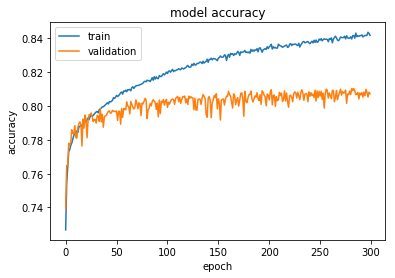

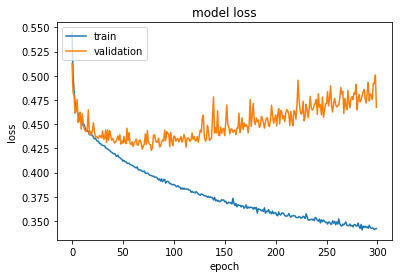

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline  
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("model.h5")

In [81]:
Y_pred=model.predict(X_test)
Y_pred=np.where(Y_pred > 0.5, 1, 0)
print Y_pred
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, Y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
0.6718464801933797


In [87]:
print np.where(Y_pred==1)
print np.where(Y_pred==0)
print np.where(y_test==1)
print y_test.shape

(array([  233,   734,  1501,  1672,  2001,  2572,  2636,  2794,  3244,
        3784,  5074,  6242,  6368,  6990,  8050,  8376,  9231,  9936,
       10305, 10678, 10901, 12031, 12909, 14286, 14420, 15175, 15959,
       17389, 19983, 20178, 20311, 21391, 21517, 23484, 23647, 24189,
       28965, 30131, 30367, 34244, 34328, 34794, 35095, 35285, 36495,
       36926, 37346, 38452, 39736, 39770, 39986, 40207, 40435, 40547,
       44637, 47319, 47329, 48129, 48168, 49005, 49136, 49398, 50383,
       50710, 51140, 51276, 52243, 53300, 54741, 57744, 57895, 58715,
       60556]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0]))
(array([    0,     1,     2, ..., 60810, 60811, 60812]), array([0, 0, 0, ..., 0, 0, 0]))
(array([    0,    12,    17, ..., 60806, 60807, 60808]), array([0, 0, 0, ..., 0, 0, 0